<a href="https://colab.research.google.com/github/Rishabhjain2003/Image_Classification/blob/main/image_classification_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
import torch.nn.functional as F

In [ ]:
dataset = MNIST(root='data/', download = True)

In [ ]:
len(dataset)

60000

In [ ]:
train_ds = MNIST(root='data/', train = True, transform=transforms.ToTensor())
test_ds = MNIST(root='data/', train = False, transform=transforms.ToTensor())
print(len(train_ds), len(test_ds))

60000 10000


In [ ]:
image, label = train_ds[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 5


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

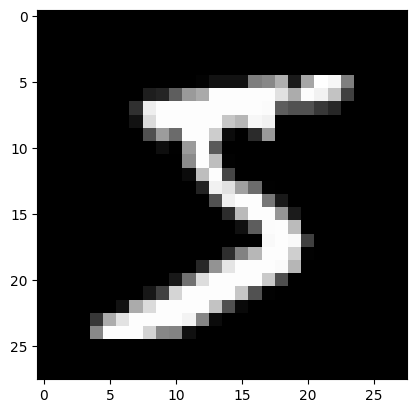

In [ ]:
plt.imshow(image[0], cmap='gray')
print(image)

In [ ]:
num_classes = 10
input_size = 28*28

model = nn.Linear(input_size, num_classes)

In [ ]:
for image, label in train_ds:
  print(label)
  print(image.shape)
  image = image.reshape(-1, 784)
  output = model(image)
  print(output[0])
  break

5
torch.Size([1, 28, 28])
tensor([ 0.0240,  0.1002, -0.1682, -0.2836, -0.0402,  0.1462,  0.1211, -0.2183,
         0.0045, -0.0952], grad_fn=<SelectBackward0>)


In [ ]:
print(output.shape)

torch.Size([1, 10])


In [ ]:
probs = F.softmax(output, dim=1)
print(probs)

tensor([[0.1057, 0.1140, 0.0872, 0.0777, 0.0991, 0.1194, 0.1165, 0.0829, 0.1036,
         0.0938]], grad_fn=<SoftmaxBackward0>)


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)
print(label)

tensor([5])
tensor([0.1194], grad_fn=<MaxBackward0>)
5


In [ ]:
loss_fn = F.cross_entropy

In [ ]:
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
  out = torch.empty(output.size())
  labels = torch.tensor([])
  labels = torch.cat((labels, torch.tensor([label])), dim=0)
  for image, label in train_ds:
    image = image.reshape(-1, 784)
    output = model(image)
    out = torch.cat((out, output), dim=0)
    labels = torch.cat((labels, torch.tensor([label])), dim=0)
  out = out.float()
  labels = labels.long()
  loss = F.cross_entropy(out, labels)
  acc = accuracy(out, labels)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  print('Loss : ', loss, ' Accuracy : ', acc)

Loss :  tensor(2.3335, grad_fn=<NllLossBackward0>)  Accuracy :  tensor(0.0688)
Loss :  tensor(2.2772, grad_fn=<NllLossBackward0>)  Accuracy :  tensor(0.1146)
Loss :  tensor(2.2245, grad_fn=<NllLossBackward0>)  Accuracy :  tensor(0.1898)
Loss :  tensor(2.1746, grad_fn=<NllLossBackward0>)  Accuracy :  tensor(0.2730)
Loss :  tensor(2.1270, grad_fn=<NllLossBackward0>)  Accuracy :  tensor(0.3689)
Loss :  tensor(2.0813, grad_fn=<NllLossBackward0>)  Accuracy :  tensor(0.4555)
Loss :  tensor(2.0375, grad_fn=<NllLossBackward0>)  Accuracy :  tensor(0.5200)
Loss :  tensor(1.9953, grad_fn=<NllLossBackward0>)  Accuracy :  tensor(0.5689)
Loss :  tensor(1.9547, grad_fn=<NllLossBackward0>)  Accuracy :  tensor(0.6080)
Loss :  tensor(1.9156, grad_fn=<NllLossBackward0>)  Accuracy :  tensor(0.6378)


In [ ]:
res = torch.empty(output.size())
res_labels = torch.tensor([])
res_labels = torch.cat((res_labels, torch.tensor([label])), dim=0)
for image, label in test_ds:
  image = image.reshape(-1, 784)
  output = model(image)
  res = torch.cat((res, output), dim=0)
  res_labels = torch.cat((res_labels, torch.tensor([label])), dim=0)
res = res.float()
res_labels = res_labels.long()
res_loss = F.cross_entropy(res, res_labels)
res_acc = accuracy(res, res_labels)
print('Loss : ', res_loss, ' Accuracy : ', res_acc)

Loss :  tensor(1.8656, grad_fn=<NllLossBackward0>)  Accuracy :  tensor(0.6727)


Label: 7 , Predicted: 7


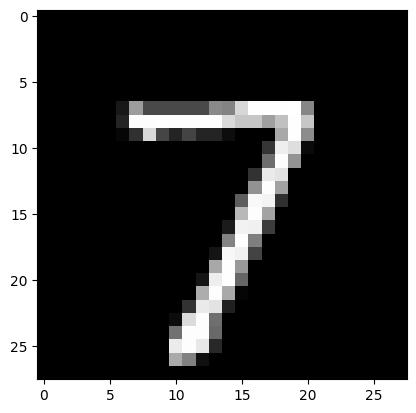

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    xb = xb.reshape(-1, 784)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

img, label = test_ds[1104]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))